**MODULACIÓN PAM**

Dada un secuencia de bits bcT almancenando cada bit en un arreglo, se procederá a realizar modulación PAM con M = 4

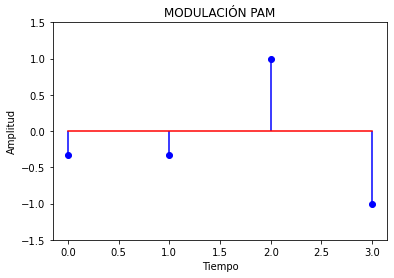

La secuencia modulada x(k):  [-0.33333333 -0.33333333  1.         -1.        ]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
M = 4 



def modulacionPAM(bc):
    # Verificar que la longitud de la secuencia de bits bc(ℓ) sea múltiplo de log2(M)
    b = int(np.log2(M))
    if len(bc) % b != 0:
        # Rellenar con ceros si no es múltiplo
        bc = np.concatenate([bc, np.zeros(b - len(bc) % b)])

    # Dividir la secuencia de bits en grupos de M
    grupos = [bc[i:i+int(np.log2(M))] for i in range(0, len(bc), int(np.log2(M)))]
    #print(grupos)

    # Diccionario de asignación de símbolos de amplitud
    simbolos = {
        (0, 0): -1,
        (0, 1): -1/3,
        (1, 0): 1,
        (1, 1): 1/3
        }
    
    #Señal Modulada 
    x_k = []
    for señal in grupos:
        t_señal = tuple(señal)
        simbolo = simbolos[tuple(t_señal)]
        x_k.append(simbolo)
    x_k = np.array(x_k)

    #Definimos el tren de pulsos de amplitud 1 y longitud 20
    t = np.arange(0,len(x_k),1)
    p = np.ones_like(t)
    #print(t)
    x_k = x_k*p
    #print(x_k)

    # Graficar el tren de pulsos
    plt.stem(t, x_k, linefmt='b-', markerfmt='bo', basefmt='r-')

    # Configurar etiquetas y título del gráfico
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title('MODULACIÓN PAM')

    # Ajustar los límites del eje y
    plt.ylim(-1.5, 1.5)
    plt.show()

    return x_k
    

bcT = np.array([0,1,0,1,1,0,0])
x_k = modulacionPAM(bcT)
print("La secuencia modulada x(k): ", x_k)


**MEDIO DE TRANSMISIÓN RUIDOSO**

Simule un medio de transmisión ruidoso definiendo un ruido N
y almacenándola en una variable N. Escriba un programa que cambie aleatoriamente el valor de cada muestra de una secuencia de muestras transmitidos x(k), almacenada en un arreglo xT. Las muestras modificados deben conformar la secuencia de muestras recibidos  x∗(k), del mismo tamaño de x(k), almacenada en un arreglo xR.


In [ ]:
def add_noise(x, snr):
    # Calcular la potencia de la señal transmitida
    signal_power = np.mean(np.abs(x) ** 2)

    # Calcular la potencia del ruido en función de la relación señal-ruido (SNR)
    noise_power = signal_power / (10 ** (snr / 10))

    # Generar el ruido gaussiano
    noise = np.random.normal(0, np.sqrt(noise_power), len(x))

    # Sumar el ruido a la señal transmitida
    x_r = x + noise

    return x_r

x_R = add_noise(x_k, 10)
print("Secuencia con ruido: ", x_R)